## 1. Set Up and Initiallization

#### 1.1 Importing the required libraries

In [12]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


#### 1.2 Loading the dataset and creating a pandas dataframe.

In [13]:
root_location = '../customer_segmentation/dataset/'
file_name = 'data.csv'

df = pd.read_csv(root_location + file_name, encoding='unicode_escape')

## 2. Initial Data Analysis

#### 2.1 Dataset Overview

In [14]:
df.head(5)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [15]:
df.tail(5)

InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID Country  
541904  12/9/2011 12:50       0.85     12680.0  France  
541905  12/9/2011 12:50       2.10     12680.0  France  
541906  12/9/2011 12:50       4.15     12680.0  France  
541907  12/9/2011 12:50       4.15     12680.0  France  
541908  12/9/2011 12:50       4.95     12680.0  France

In [16]:
df.shape

(541909, 8)

In [17]:
# Listing the names of Columns  
list(df.columns.values)

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

In [18]:
# Data type of each column of df
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [19]:
# printing unique values in each column
print(df.nunique())

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64


In [20]:
# number of occurrence of each country
df.Country.value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


#### 2.2 Summary Statistics

In [21]:
# Summary statistics for numerical variables
df.describe(include='object').T

count unique                                 top    freq
InvoiceNo    541909  25900                              573585    1114
StockCode    541909   4070                              85123A    2313
Description  540455   4223  WHITE HANGING HEART T-LIGHT HOLDER    2369
InvoiceDate  541909  23260                    10/31/2011 14:41    1114
Country      541909     38                      United Kingdom  495478

In [22]:
# Summary statistics for numerical variables
df.describe().T

count          mean          std       min       25%       50%  \
Quantity    541909.0      9.552250   218.081158 -80995.00      1.00      3.00   
UnitPrice   541909.0      4.611114    96.759853 -11062.06      1.25      2.08   
CustomerID  406829.0  15287.690570  1713.600303  12346.00  13953.00  15152.00   

                 75%      max  
Quantity       10.00  80995.0  
UnitPrice       4.13  38970.0  
CustomerID  16791.00  18287.0

## 3. Data Cleaning 

#### 3.1 Handling Missing Values

In [23]:
# Finding number of missing values in each column
missing_values = df.isnull().sum().sum()
missing_values

136534

In [27]:
# Finding number of missing values in each column
missing_values_in_each_column = df.isnull().sum()
missing_values_in_each_column

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Text(0.5, 1.0, 'Percentage of missing values in each columns')

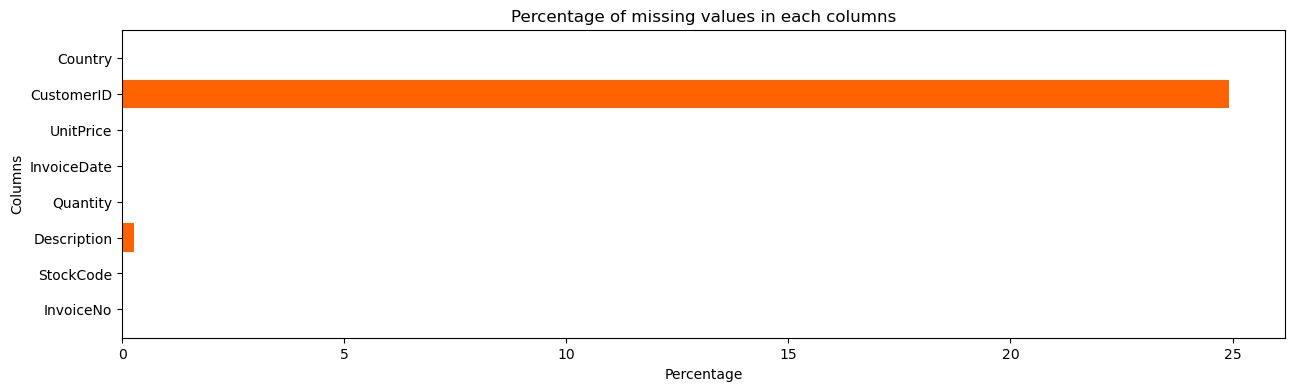

In [28]:
# Plot the barh chart
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_values_in_each_column.index, ((missing_values_in_each_column/df.shape[0])*100), color='#ff6200')
plt.xlabel('Percentage')
plt.ylabel('Columns')
plt.title('Percentage of missing values in each columns')

In [29]:
# Droping the missing values of all the columns
df = df.dropna() 
df.shape

(406829, 8)

In [30]:
# Making sure that there is no missing values
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#### 3.2 Handling Duplicates

In [31]:
# Finding duplicate values 
df_duplicated_values = df.duplicated()
df[df_duplicated_values]

InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

            InvoiceDate  UnitPrice  CustomerID         Country  
517     12/1/2010 11:45       1.25     17908.0  United Kingdom  
527     12/1/2010 11:45       2.10     17908.0  United Kingdom  
537     12/1/2010 11:45       2.95     17908.0  United Kingdom  
539     12/1/2010 11:45       4.95     17908.0  United Kingdom  
555     12/1/2010 11:49       2.95     17920.0  United Kingdom  
...                 ...        ...         ...             ...  
541675  12/9/2011 11:34       0.39     14446.0  United Kingdom  
541689  12/9/2011 11:34       2.49     14446.0  United Kingdom  
541692  12/9/2011 11:34       1.95     14446.0  United Kingdom  
541699  12/9/2011 11:34       2.10     14446.0  United Kingdom  
541701  12/9/2011 11:34       2.08     14446.0  United Kingdom  

[5225 rows x 8 columns]

In [32]:
# Total number of duplicated rows
df.duplicated().sum()

5225

In [33]:
# Number of Duplicated values of each invoice number (Other than original)
duplicated_values = df[df_duplicated_values].groupby('InvoiceNo')['CustomerID'].count()

In [434]:
duplicated_values.head(50)

InvoiceNo
536409     4
536412    13
536446     1
536464     4
536488     1
536522     2
536528     9
536530     1
536531     1
536551     4
536557     1
536559     1
536569     2
536637     8
536742     1
536749     8
536796    16
536798     2
536846     6
536863     6
536874     6
536945     4
536981     1
537042     3
537045     3
537051     5
537059     1
537111     1
537126     1
537131     1
537133     5
537136     3
537140     3
537144     9
537153     1
537154     9
537155     3
537156     2
537176     1
537192     3
537193     3
537195     1
537196    10
537199     4
537200     1
537202     5
537208     7
537210     1
537222     1
537224    17
Name: CustomerID, dtype: int64

<Axes: xlabel='InvoiceNo'>

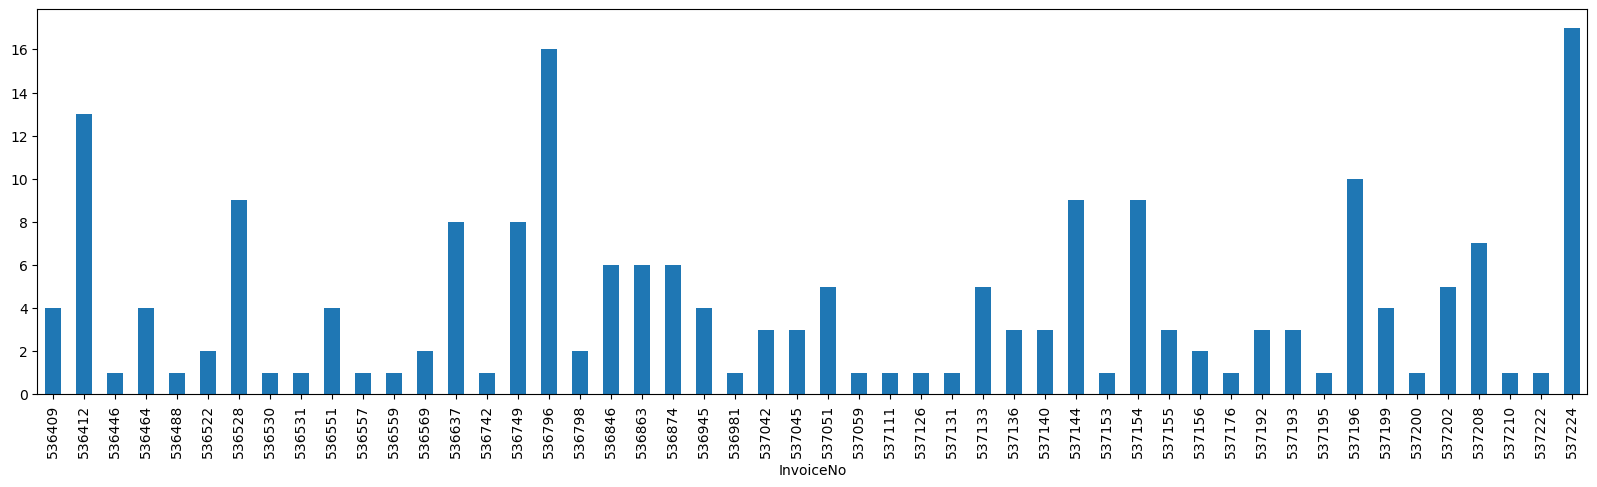

In [34]:
plt.rcParams["figure.figsize"] = (20,5)
duplicated_values[:50].plot(kind='bar')

In [35]:
duplicated_values.tail(50)

InvoiceNo
580914     1
580958     7
580982     2
580998     1
580999     2
581116     1
581125     1
581134     7
581142     5
581147     1
581149     4
581166     9
581173     3
581191     1
581237     4
581253     1
581310     1
581334     3
581345     1
581352     3
581404     1
581405     3
581412     2
581414     7
581425     3
581449     1
581450     1
581456     1
581471     1
581514     1
581538     6
C538341    9
C540535    1
C543611    3
C543837    1
C548469    1
C550165    1
C555723    1
C560855    1
C562582    1
C568370    3
C568419    1
C570099    1
C570556    3
C571893    1
C572226    1
C574095    1
C574510    1
C575940    1
C580764    1
Name: CustomerID, dtype: int64

<Axes: xlabel='InvoiceNo'>

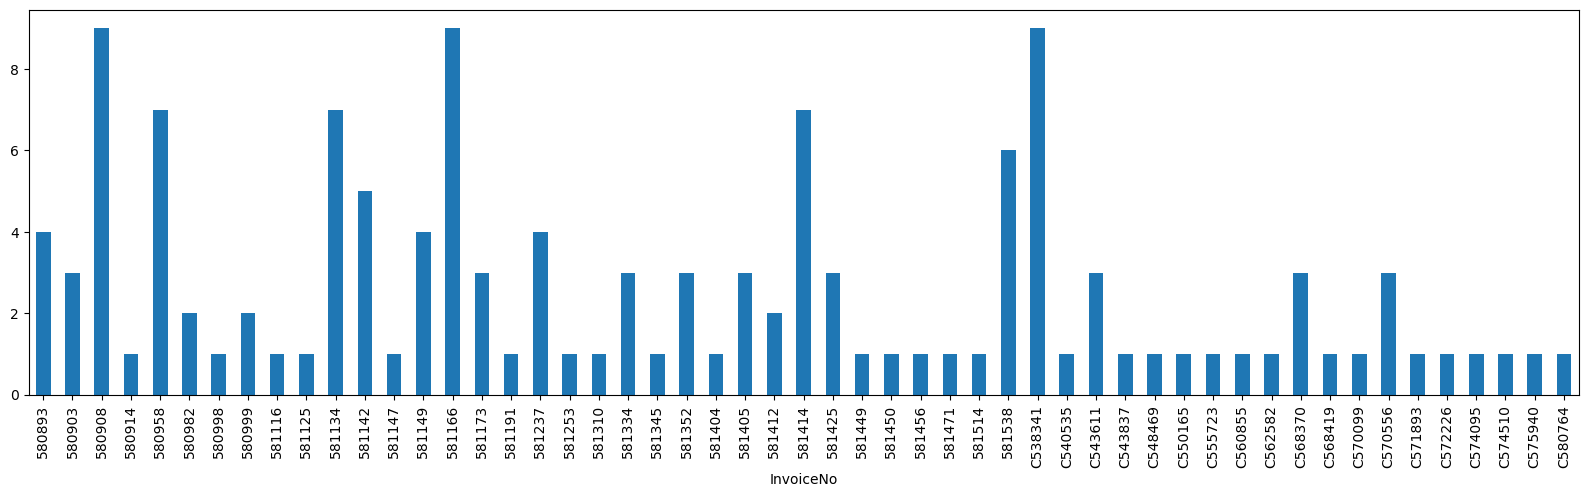

In [36]:
plt.rcParams["figure.figsize"] = (20,5)
duplicated_values[1850:1903].plot(kind='bar')


In [37]:
# Droping all the duplicated rows 
df.drop_duplicates()

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/2010 8:26       2.55     17850.0  United Kingdom  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom  
2        12/1/2010 8:26       2.75     17850.0  United Kingdom  
3        12/1/2010 8:26       3.39     17850.0  United Kingdom  
4        12/1/2010 8:26       3.39     17850.0  United Kingdom  
...                 ...        ...         ...             ...  
541904  12/9/2011 12:50       0.85     12680.0          France  
541905  12/9/2011 12:50       2.10     12680.0          France  
541906  12/9/2011 12:50       4.15     12680.0          France  
541907  12/9/2011 12:50       4.15     12680.0          France  
541908  12/9/2011 12:50       4.95     12680.0          France  

[401604 rows x 8 columns]

In [38]:
df.shape[0]

406829

#### 3.3 Treating Cancelled Transactions

In [39]:
# Lets first see the number of cancelled transactions
df['InvoiceNo'].str.startswith('C').sum()

8905

In [40]:
# Calculate the total number of transactions
total_transactions = len(df)

# Calculate the number of canceled transactions (those starting with 'C')
canceled_transactions = len(df[df['InvoiceNo'].str.startswith('C')])

# Calculate the percentage of canceled transactions
cancel_percentage = (canceled_transactions / total_transactions) * 100

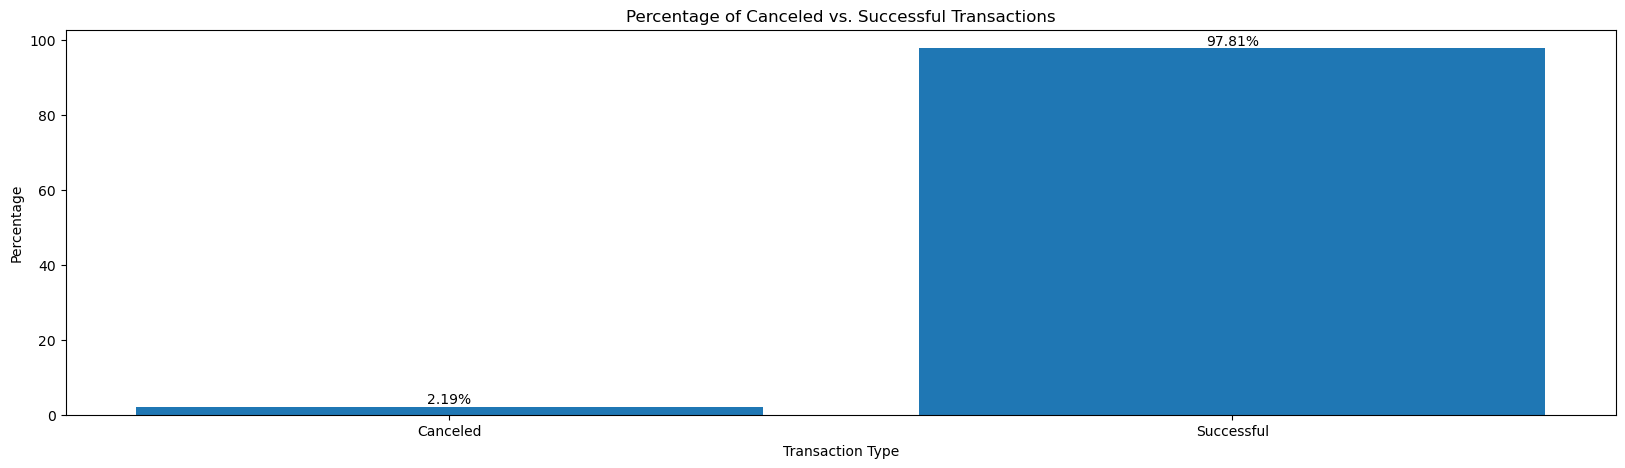

In [41]:
# Create a bar plot
plt.bar(['Canceled', 'Successful'], [cancel_percentage, 100 - cancel_percentage])
plt.xlabel('Transaction Type')
plt.ylabel('Percentage')
plt.title('Percentage of Canceled vs. Successful Transactions')

# Add percentage markers on top of the bars
for x, y in zip(['Canceled', 'Successful'], [cancel_percentage, 100 - cancel_percentage]):
    plt.text(x, y, f'{y:.2f}%', ha='center', va='bottom')

# Show the plot
plt.show()

In [42]:
# Removing the Canceled transactions
df = df[~df['InvoiceNo'].str.startswith('C')]

In [43]:
# Making sure there is no canceled transaction
df['InvoiceNo'].str.startswith('C').sum()

0

In [44]:
df.shape[0]

397924

#### 3.4 Correcting StockCode Anomalies

In [45]:
df.shape

(397924, 8)

In [46]:
# Finding number of unique stock codes
unique_stockcodes = pd.DataFrame(df['StockCode'].unique())
len(unique_stockcodes)

3665

In [47]:
unique_stockcodes

0
0     85123A
1      71053
2     84406B
3     84029G
4     84029E
...      ...
3660  90214U
3661  90214W
3662  90214Z
3663   90089
3664   23843

[3665 rows x 1 columns]

In [48]:
#Finding the occurrence of each unique stock code
df['StockCode'].value_counts()

StockCode
85123A    2035
22423     1724
85099B    1618
84879     1408
47566     1397
          ... 
90168        1
90169        1
90202A       1
90118        1
23843        1
Name: count, Length: 3665, dtype: int64

<Axes: xlabel='StockCode'>

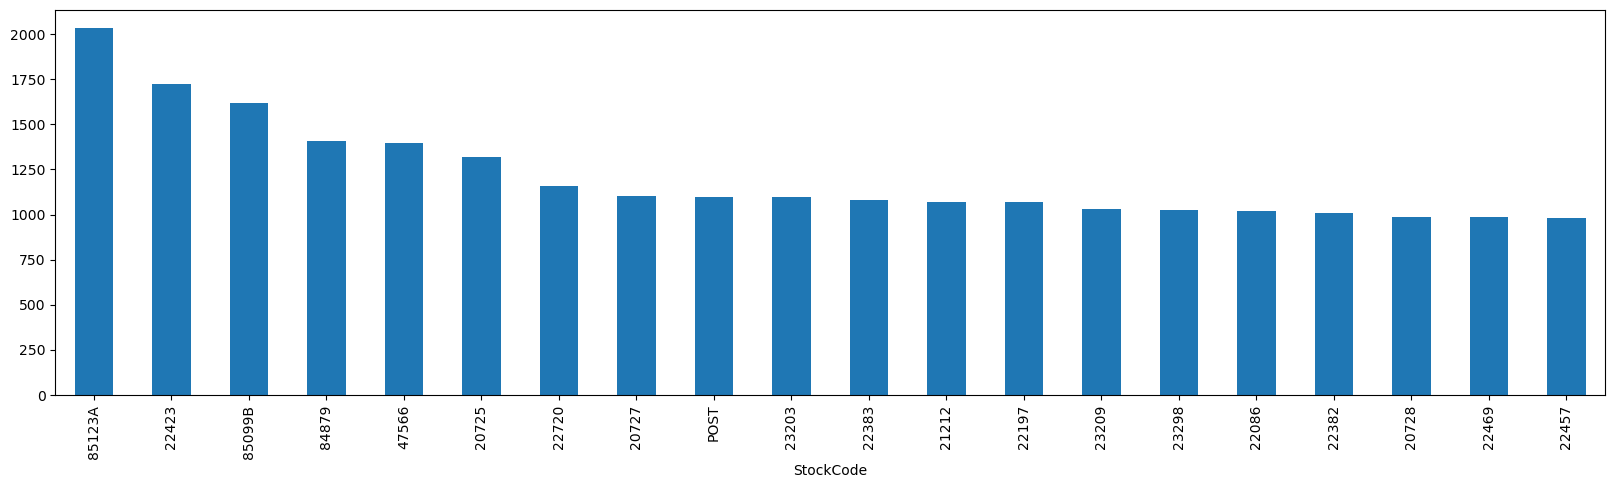

In [49]:
plt.rcParams["figure.figsize"] = (20,5)
df['StockCode'].value_counts()[:20].plot(kind='bar')

In [50]:
# Counting the lenght of unique stock stock codes
unique_stockcodes[0].apply(len).value_counts()
# Looks like stock codes with lenght upto 5 or 6 digits seems to have standard stockcodes lenght


0
5     2785
6      873
4        2
7        1
2        1
1        1
12       1
3        1
Name: count, dtype: int64

In [51]:
# Lets count the number of maximum digit in each unique stock codes 
def count_digits(string):
    return sum(item.isdigit() for item in string)

# Lets check the number of digits unique stock codes have
no_of_digits = unique_stockcodes[0].apply(count_digits)
no_of_digits.value_counts()

0
5    3659
0       5
1       1
Name: count, dtype: int64

In [52]:
anomalous_stock_codes = unique_stockcodes[(unique_stockcodes[0].str.len() == 4) | (unique_stockcodes[0].str.len() == 2) | (unique_stockcodes[0].str.len() == 1) | (unique_stockcodes[0].str.len() == 12) | (unique_stockcodes[0].str.len() == 3)]
anomalous_stockcodes = [code for code in unique_stockcodes[0] if sum(c.isdigit() for c in str(code)) in (0, 1)]
anomalous_stockcodes

['POST', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT']

In [53]:
anomalous_stockcodes_list = ['POST', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT']


In [54]:
# Counting the occurence of 
stock_codes_to_filter = ['POST', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT']
filtered_df = df[df['StockCode'].isin(stock_codes_to_filter)]
filtered_df['StockCode'].value_counts()

StockCode
POST            1099
M                290
C2               133
DOT               16
BANK CHARGES      12
PADS               4
Name: count, dtype: int64

In [55]:
# Removing the anomal stock codes
df = df[~df['StockCode'].isin(anomalous_stockcodes_list)]
df.shape[0]

396370

#### 3.5 Cleaning Description Column

In [62]:
df['Description'].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1724
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1397
                                      ... 
MULTICOLOUR POLKADOT PLATE               1
PEARL & SHELL 42"NECKL. IVORY            1
PURPLE FRANGIPANI HAIRCLIP               1
ZINC PLANT POT HOLDER                    1
PAPER CRAFT , LITTLE BIRDIE              1
Name: count, Length: 3871, dtype: int64

<Axes: xlabel='Description'>

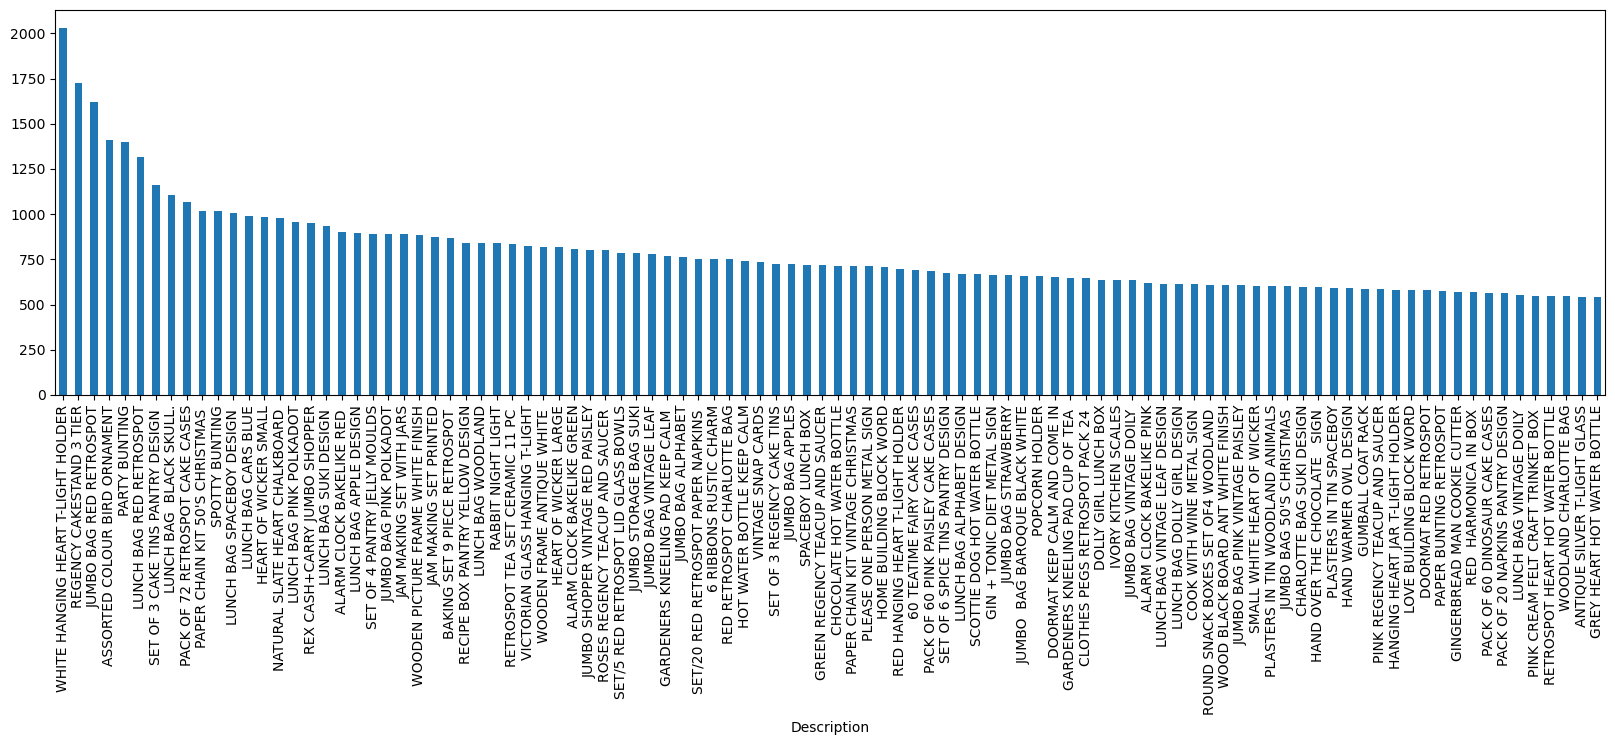

In [458]:
plt.rcParams["figure.figsize"] = (20,5)
df['Description'].value_counts()[:100].plot(kind='bar')

<Axes: xlabel='Description'>

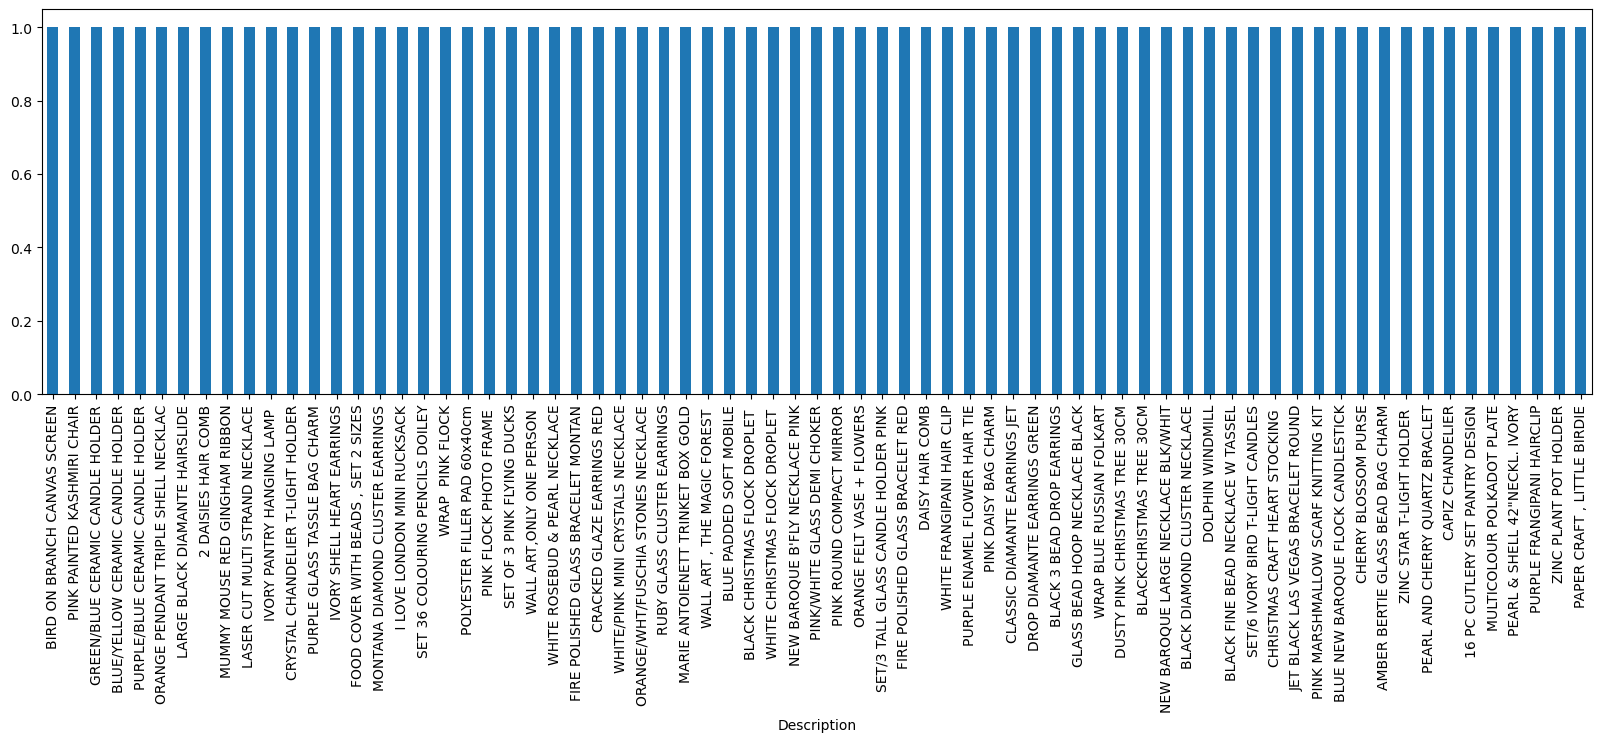

In [459]:
plt.rcParams["figure.figsize"] = (20,5)
df['Description'].value_counts()[3800:].plot(kind='bar')

In [460]:
# Apparently, all the description are in upper case, so that might be the standard form for description.
# Lets check if we have any description in lower case
unique_description = pd.DataFrame(df['Description'].unique())
plt.rcParams["figure.figsize"] = (20,5)
unique_description[unique_description[0].str.contains(r'[a-z]')]

0
320               BAG 500g SWIRLY MARBLES
544          POLYESTER FILLER PAD 45x45cm
783          POLYESTER FILLER PAD 45x30cm
784          POLYESTER FILLER PAD 40x40cm
795        FRENCH BLUE METAL DOOR SIGN No
926               BAG 250g SWIRLY MARBLES
927               BAG 125g SWIRLY MARBLES
972    3 TRADITIONAl BISCUIT CUTTERS  SET
1357       FOLK ART GREETING CARD,pack/12
1718  ESSENTIAL BALM 3.5g TIN IN ENVELOPE
1785       POLYESTER FILLER PAD 65CMx65CM
2187         NUMBER TILE VINTAGE FONT No 
2269        NUMBER TILE COTTAGE GARDEN No
2340       POLYESTER FILLER PAD 30CMx30CM
3050         POLYESTER FILLER PAD 60x40cm
3101      FLOWERS HANDBAG blue and orange
3176                    Next Day Carriage
3422         THE KING GIFT BAG 25x24x12cm
3756                High Resolution Image

<Axes: xlabel='0'>

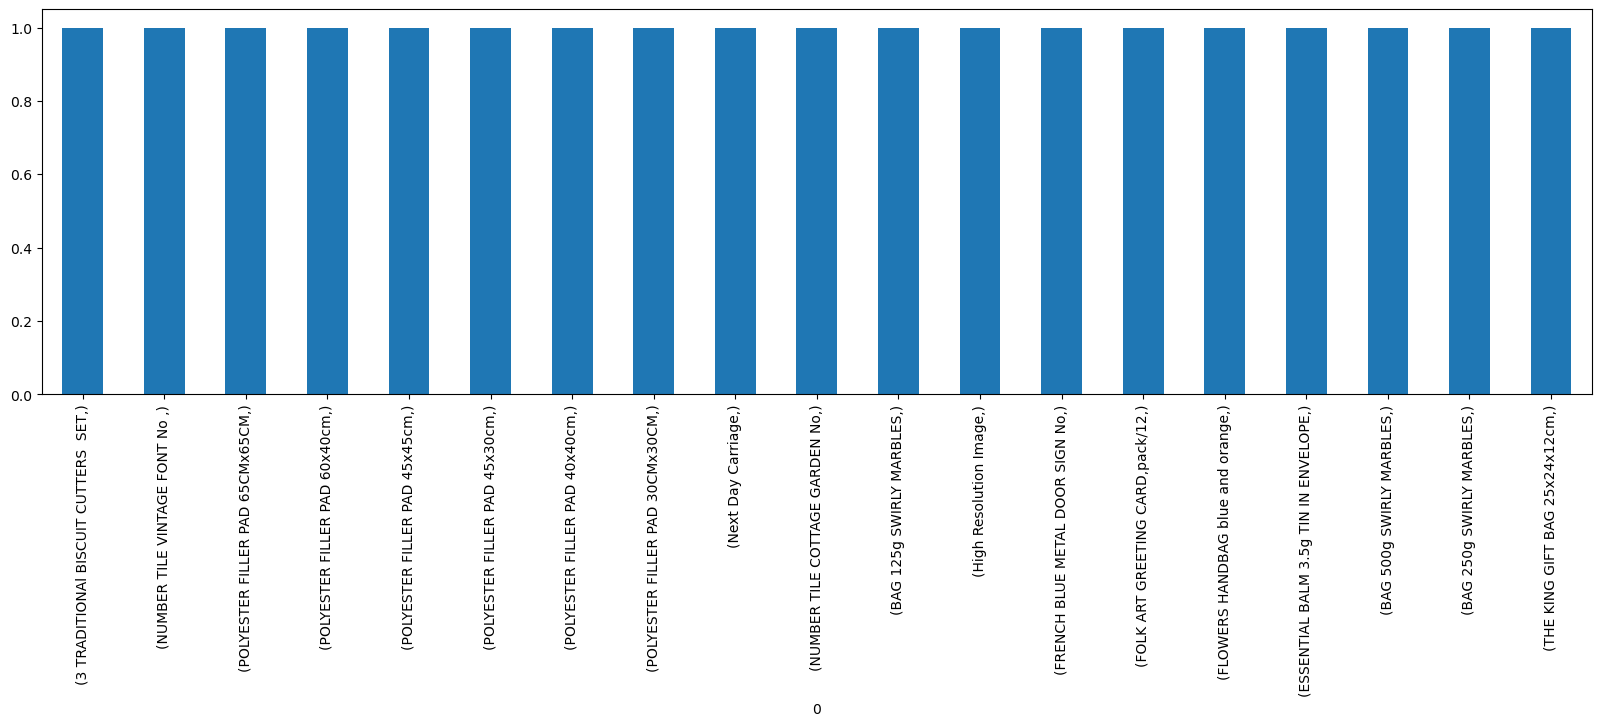

In [461]:
unique_description[unique_description[0].str.contains(r'[a-z]')].value_counts()[:20].plot(kind='bar')

In [462]:
# We have lower case letters in 19 product description. However, 2 of them seems odd - 'Next Day Carriage' and 'High Resolution Image'. So we need to drop those rows.
df = df[~df['Description'].isin(['Next Day Carriage', 'High Resolution Image'])]
df.shape[0]


396288

#### 3.6 Treating Zero Unit Prices

In [463]:
# Calculate value counts of unique unit prices
unit_price_counts = df['UnitPrice'].value_counts()

# Create a DataFrame with counts as a column
unique_unitprice = pd.DataFrame({'UnitPrice': unit_price_counts.index, 'Count': unit_price_counts.values})
unique_unitprice.sort_values(by='UnitPrice')

UnitPrice  Count
124       0.00     33
97        0.04     66
85        0.06    111
190       0.07      7
116       0.08     45
..         ...    ...
142     165.00     21
315     175.00      1
174     195.00     10
187     295.00      8
267     649.50      2

[353 rows x 2 columns]

In [464]:
# Here we see that there are 33 rows with '0' Unit Price. So We need to drop those rows
df = df[df['UnitPrice'] != 0]
df.shape[0]

396255

## 4. Calculating the main Features

#### 4.1 Recency

In [465]:
present_date = '2012-01-01'
present_date = pd.to_datetime(present_date)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) 

# Calculating the Recency (When was the last time customer brought a product from the business from the present date)
recency = df.groupby(['CustomerID']).agg({'InvoiceDate': lambda x: ((present_date-x.max()).days)})

# Renaming the Invoice date column to Recency
recency.rename(columns={"InvoiceDate": "Recency"}, inplace=True)

recency


Recency
CustomerID         
12346.0         347
12347.0          24
12348.0          97
12349.0          40
12350.0         332
...             ...
18280.0         299
18281.0         202
18282.0          29
18283.0          25
18287.0          64

[4334 rows x 1 columns]

#### 4.2 Frequency

In [466]:
# Calculate Frequency
frequency = df.drop_duplicates(subset='InvoiceNo').groupby(['CustomerID'])[['InvoiceNo']].count()

# Renaming the Invoice Number column to Frequency
frequency.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)

frequency


Frequency
CustomerID           
12346.0             1
12347.0             7
12348.0             4
12349.0             1
12350.0             1
...               ...
18280.0             1
18281.0             1
18282.0             2
18283.0            16
18287.0             3

[4334 rows x 1 columns]

#### 4.3 Monetary

In [467]:
# Calculating the monetary value (the total amount each customer has brought to the business)
df["Total_Amount"]=df["Quantity"]*df["UnitPrice"]
monetary = df.groupby(["CustomerID"])[["Total_Amount"]].sum()

# Renaming the Total Amount column to Monetary
monetary.rename(columns={'Total_Amount': 'Monetary'}, inplace=True)

monetary

Monetary
CustomerID          
12346.0     77183.60
12347.0      4310.00
12348.0      1437.24
12349.0      1457.55
12350.0       294.40
...              ...
18280.0       180.60
18281.0        80.82
18282.0       178.05
18283.0      2088.93
18287.0      1837.28

[4334 rows x 1 columns]

In [468]:
# Creating new dataframe by merging the Recency, Frequency, Monetary Values
df_rfm = pd.concat([recency, frequency, monetary], axis=1)
df_rfm

Recency  Frequency  Monetary
CustomerID                              
12346.0         347          1  77183.60
12347.0          24          7   4310.00
12348.0          97          4   1437.24
12349.0          40          1   1457.55
12350.0         332          1    294.40
...             ...        ...       ...
18280.0         299          1    180.60
18281.0         202          1     80.82
18282.0          29          2    178.05
18283.0          25         16   2088.93
18287.0          64          3   1837.28

[4334 rows x 3 columns]

## 5. Modeling

In [469]:
# Calculate quantiles 
quantiles = df_rfm.quantile(q=[0.25, 0.5, 0.75])
def r_score(r):
    if r <= quantiles['Recency'][0.25]:
        return 4
    elif r <= quantiles['Recency'][0.50]:
        return 3
    elif r <= quantiles['Recency'][0.75]:
        return 2
    else:
        return 1

def fm_score(f, m):
    if f <= quantiles[m][0.25]:
        return 1
    elif f <= quantiles[m][0.50]:
        return 2
    elif f <= quantiles[m][0.75]:
        return 3
    else:
        return 4

In [470]:
# Assigning Individual Scores
df_rfm['R_Score'] = df_rfm['Recency'].apply(r_score)
df_rfm['F_Score'] = df_rfm['Frequency'].apply(fm_score, args=('Frequency',))
df_rfm['M_Score'] = df_rfm['Monetary'].apply(fm_score, args=('Monetary',))
df_rfm.head()

Recency  Frequency  Monetary  R_Score  F_Score  M_Score
CustomerID                                                         
12346.0         347          1  77183.60        1        1        4
12347.0          24          7   4310.00        4        4        4
12348.0          97          4   1437.24        2        3        3
12349.0          40          1   1457.55        3        1        3
12350.0         332          1    294.40        1        1        1

### 5.1 Method 1 : Calculating the Combined RFM Score & Segmenting based on combined rfm score.

In [471]:
# for that creating a copy of df_rfm
df_rfm_score = df_rfm.copy()
df_rfm_score

Recency  Frequency  Monetary  R_Score  F_Score  M_Score
CustomerID                                                         
12346.0         347          1  77183.60        1        1        4
12347.0          24          7   4310.00        4        4        4
12348.0          97          4   1437.24        2        3        3
12349.0          40          1   1457.55        3        1        3
12350.0         332          1    294.40        1        1        1
...             ...        ...       ...      ...      ...      ...
18280.0         299          1    180.60        1        1        1
18281.0         202          1     80.82        1        1        1
18282.0          29          2    178.05        4        2        1
18283.0          25         16   2088.93        4        4        4
18287.0          64          3   1837.28        3        3        4

[4334 rows x 6 columns]

In [472]:
# Calculating RFM Score
df_rfm_score['RFM_Score'] = df_rfm_score['R_Score'] + df_rfm_score['F_Score'] + df_rfm_score['M_Score']
df_rfm_score

Recency  Frequency  Monetary  R_Score  F_Score  M_Score  RFM_Score
CustomerID                                                                    
12346.0         347          1  77183.60        1        1        4          6
12347.0          24          7   4310.00        4        4        4         12
12348.0          97          4   1437.24        2        3        3          8
12349.0          40          1   1457.55        3        1        3          7
12350.0         332          1    294.40        1        1        1          3
...             ...        ...       ...      ...      ...      ...        ...
18280.0         299          1    180.60        1        1        1          3
18281.0         202          1     80.82        1        1        1          3
18282.0          29          2    178.05        4        2        1          7
18283.0          25         16   2088.93        4        4        4         12
18287.0          64          3   1837.28        3        3        4         10

[4334 rows x 7 columns]

In [473]:
df_rfm_score.describe()

Recency    Frequency       Monetary      R_Score      F_Score  \
count  4334.000000  4334.000000    4334.000000  4334.000000  4334.000000   
mean    114.226581     4.245270    2021.190505     2.505307     2.313106   
std     100.175327     7.634633    8907.483348     1.121654     1.144137   
min      22.000000     1.000000       3.750000     1.000000     1.000000   
25%      39.000000     1.000000     305.560000     2.000000     1.000000   
50%      72.000000     2.000000     668.075000     3.000000     2.000000   
75%     164.000000     5.000000    1631.622500     4.000000     3.000000   
max     395.000000   206.000000  279138.020000     4.000000     4.000000   

           M_Score    RFM_Score  
count  4334.000000  4334.000000  
mean      2.500000     7.318413  
std       1.118369     2.879878  
min       1.000000     3.000000  
25%       1.250000     5.000000  
50%       2.500000     7.000000  
75%       3.750000    10.000000  
max       4.000000    12.000000

In [474]:
# Create RFM segments based on the RFM score
segment_labels = ['Low-Value', 'Mid-Value', 'High-Value']
df_rfm_score['Value_Segment'] = pd.qcut(df_rfm_score['RFM_Score'], q=3, labels=segment_labels)
df_rfm_score.head(5)

Recency  Frequency  Monetary  R_Score  F_Score  M_Score  \
CustomerID                                                            
12346.0         347          1  77183.60        1        1        4   
12347.0          24          7   4310.00        4        4        4   
12348.0          97          4   1437.24        2        3        3   
12349.0          40          1   1457.55        3        1        3   
12350.0         332          1    294.40        1        1        1   

            RFM_Score Value_Segment  
CustomerID                           
12346.0             6     Low-Value  
12347.0            12    High-Value  
12348.0             8     Mid-Value  
12349.0             7     Mid-Value  
12350.0             3     Low-Value

In [539]:
# RFM Segment Distribution
segment_counts = df_rfm_score['Value_Segment'].value_counts().reset_index()
segment_counts.columns = ['Value_Segment', 'Count']

pastel_colors = px.colors.qualitative.Pastel

# Create the bar chart
fig_segment_dist = px.bar(segment_counts, x='Value_Segment', y='Count', 
                          color='Value_Segment', color_discrete_sequence=pastel_colors,
                          title='RFM Value Segment Distribution', width=400, height=400)

# Update the layout
fig_segment_dist.update_layout(xaxis_title='RFM Value Segment',
                              yaxis_title='Count',
                              showlegend=False)


In [540]:
df_rfm_score.loc[df_rfm_score['Value_Segment'] == 'High-Value']

Recency  Frequency  Monetary  R_Score  F_Score  M_Score  \
CustomerID                                                            
12347.0          24          7   4310.00        4        4        4   
12352.0          58          7   1385.74        3        4        3   
12356.0          44          3   2487.43        3        3        4   
12362.0          25         10   4737.23        4        4        4   
12364.0          29          4   1208.10        4        3        3   
...             ...        ...       ...      ...      ...      ...   
18257.0          61          8   2337.63        3        4        4   
18259.0          46          3   2338.60        3        3        4   
18272.0          24          6   3078.58        4        4        4   
18283.0          25         16   2088.93        4        4        4   
18287.0          64          3   1837.28        3        3        4   

            RFM_Score Value_Segment  
CustomerID                           
12347.0            12    High-Value  
12352.0            10    High-Value  
12356.0            10    High-Value  
12362.0            12    High-Value  
12364.0            10    High-Value  
...               ...           ...  
18257.0            11    High-Value  
18259.0            10    High-Value  
18272.0            12    High-Value  
18283.0            12    High-Value  
18287.0            10    High-Value  

[1182 rows x 8 columns]

In [556]:
# Create a new column for RFM Customer Segments
df_rfm_score['RFM_Customer_Segments'] = ''

# Assign RFM segments based on the RFM score
df_rfm_score.loc[df_rfm_score['RFM_Score'] >= 11, 'RFM_Customer_Segments'] = 'Champions'
df_rfm_score.loc[(df_rfm_score['RFM_Score'] >= 10) & (df_rfm_score['RFM_Score'] < 11), 'RFM_Customer_Segments'] = 'Loyal'
df_rfm_score.loc[(df_rfm_score['RFM_Score'] >= 8) & (df_rfm_score['RFM_Score'] < 10), 'RFM_Customer_Segments'] = 'Potential Loyalists'
df_rfm_score.loc[(df_rfm_score['RFM_Score'] >= 6) & (df_rfm_score['RFM_Score'] < 8), 'RFM_Customer_Segments'] = 'Small Buyer/Cannot Lose'
df_rfm_score.loc[(df_rfm_score['RFM_Score'] >= 5) & (df_rfm_score['RFM_Score'] < 6), 'RFM_Customer_Segments'] = 'At Risk'
df_rfm_score.loc[(df_rfm_score['RFM_Score'] >= 4) & (df_rfm_score['RFM_Score'] < 5), 'RFM_Customer_Segments'] = "Need Attention"
df_rfm_score.loc[(df_rfm_score['RFM_Score'] >= 3) & (df_rfm_score['RFM_Score'] < 4), 'RFM_Customer_Segments'] = "Lost"

# Assign RFM segments based on the RFM score
# df_rfm_score.loc[df_rfm_score['RFM_Score'] >= 9, 'RFM_Customer_Segments'] = 'Champions'
# df_rfm_score.loc[(df_rfm_score['RFM_Score'] >= 6) & (df_rfm_score['RFM_Score'] < 9), 'RFM_Customer_Segments'] = 'Potential Loyalists'
# df_rfm_score.loc[(df_rfm_score['RFM_Score'] >= 5) & (df_rfm_score['RFM_Score'] < 6), 'RFM_Customer_Segments'] = 'At Risk Customers'
# df_rfm_score.loc[(df_rfm_score['RFM_Score'] >= 4) & (df_rfm_score['RFM_Score'] < 5), 'RFM_Customer_Segments'] = "Can't Lose"
# df_rfm_score.loc[(df_rfm_score['RFM_Score'] >= 3) & (df_rfm_score['RFM_Score'] < 4), 'RFM_Customer_Segments'] = 'Lost'

In [557]:
# Print the updated data with RFM segments
df_rfm_score.head()

Recency  Frequency  Monetary  R_Score  F_Score  M_Score  \
CustomerID                                                            
12346.0         347          1  77183.60        1        1        4   
12347.0          24          7   4310.00        4        4        4   
12348.0          97          4   1437.24        2        3        3   
12349.0          40          1   1457.55        3        1        3   
12350.0         332          1    294.40        1        1        1   

            RFM_Score Value_Segment    RFM_Customer_Segments  
CustomerID                                                    
12346.0             6     Low-Value  Small Buyer/Cannot Lose  
12347.0            12    High-Value                Champions  
12348.0             8     Mid-Value      Potential Loyalists  
12349.0             7     Mid-Value  Small Buyer/Cannot Lose  
12350.0             3     Low-Value                     Lost

In [558]:
df_rfm_score['RFM_Customer_Segments'].value_counts()

RFM_Customer_Segments
Small Buyer/Cannot Lose    893
Potential Loyalists        844
Champions                  788
Need Attention             494
At Risk                    476
Lost                       445
Loyal                      394
Name: count, dtype: int64

In [559]:
segment_product_counts = df_rfm_score.groupby(['Value_Segment', 'RFM_Customer_Segments']).size().reset_index(name='Count')

segment_product_counts = segment_product_counts.sort_values('Count', ascending=False)

fig_treemap_segment_product = px.treemap(segment_product_counts, 
                                         path=['Value_Segment', 'RFM_Customer_Segments'], 
                                         values='Count',
                                         color='Value_Segment', color_discrete_sequence=px.colors.qualitative.Pastel,
                                         title='Customer Segments by RFM Score')
fig_treemap_segment_product.show()

In [560]:
import plotly.colors

pastel_colors = plotly.colors.qualitative.Pastel

segment_counts = df_rfm_score['RFM_Customer_Segments'].value_counts()

# Create a bar chart to compare segment counts
fig = go.Figure(data=[go.Bar(x=segment_counts.index, y=segment_counts.values,
                            marker=dict(color=pastel_colors))])

# Set the color of the Champions segment as a different color
champions_color = 'rgb(158, 202, 225)'
fig.update_traces(marker_color=[champions_color if segment == 'Champions' else pastel_colors[i]
                                for i, segment in enumerate(segment_counts.index)],
                  marker_line_color='rgb(8, 48, 107)',
                  marker_line_width=1.5, opacity=0.6)

# Update the layout
fig.update_layout(title='Comparison of RFM Segments',
                  xaxis_title='RFM Segments',
                  yaxis_title='Number of Customers',
                  showlegend=False)

fig.show()

In [566]:
# Performance Evaluation

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from tabulate import tabulate

# Compute number of customers
num_observations = len(df_rfm_score)

# Separate the features and the cluster labels
rfm_X = df_rfm_score.drop(['Value_Segment','RFM_Customer_Segments'], axis=1)
rfm_segments = df_rfm_score['Value_Segment']

# Compute the metrics
rfm_sil_score = silhouette_score(rfm_X, rfm_segments)
rfm_calinski_score = calinski_harabasz_score(rfm_X, rfm_segments)
rfm_davies_score = davies_bouldin_score(rfm_X, rfm_segments)

# Create a table to display the metrics and the number of observations
table_data = [
    ["Number of Observations", num_observations],
    ["Silhouette Score", rfm_sil_score],
    ["Calinski Harabasz Score", rfm_calinski_score],
    ["Davies Bouldin Score", rfm_davies_score]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+-------------------------+--------------------+
|         Metric          |       Value        |
+-------------------------+--------------------+
| Number of Observations  |        4334        |
|    Silhouette Score     | 0.0861632697097337 |
| Calinski Harabasz Score | 139.67072711303203 |
|  Davies Bouldin Score   | 1.2973842734889383 |
+-------------------------+--------------------+


### 5.2 Method 2 : Using individual Recency, Frequency and Monetary features


In [475]:
# for that creating a copy of df_rfm
df_cluster = df_rfm.copy()
df_cluster

Recency  Frequency  Monetary  R_Score  F_Score  M_Score
CustomerID                                                         
12346.0         347          1  77183.60        1        1        4
12347.0          24          7   4310.00        4        4        4
12348.0          97          4   1437.24        2        3        3
12349.0          40          1   1457.55        3        1        3
12350.0         332          1    294.40        1        1        1
...             ...        ...       ...      ...      ...      ...
18280.0         299          1    180.60        1        1        1
18281.0         202          1     80.82        1        1        1
18282.0          29          2    178.05        4        2        1
18283.0          25         16   2088.93        4        4        4
18287.0          64          3   1837.28        3        3        4

[4334 rows x 6 columns]

##### 5.2.1 Scaling the data

- Here the features have different ranges of value, so we have to use standard scaler to ensure that all features have a similar scale, so that we can prevent some features dominating others. 

In [476]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# List of columns that don't need to be scaled
columns_to_exclude = ['R_Score', 'F_Score', 'M_Score']

# List of columns that need to be scaled
columns_to_scale = df_cluster.columns.difference(columns_to_exclude)

# Copy the cleaned dataset
df_cluster_scaled = df_cluster.copy()

# Applying the scaler to the necessary columns in the dataset
df_cluster_scaled[columns_to_scale] = scaler.fit_transform(df_cluster_scaled[columns_to_scale])

# Display the first few rows of the scaled data
df_cluster_scaled

Recency  Frequency  Monetary  R_Score  F_Score  M_Score
CustomerID                                                          
12346.0     2.323928  -0.425121  8.439093        1        1        4
12347.0    -0.900791   0.360862  0.256983        4        4        4
12348.0    -0.171984  -0.032130 -0.065565        2        3        3
12349.0    -0.741052  -0.425121 -0.063284        3        1        3
12350.0     2.174174  -0.425121 -0.193881        1        1        1
...              ...        ...       ...      ...      ...      ...
18280.0     1.844713  -0.425121 -0.206658        1        1        1
18281.0     0.876299  -0.425121 -0.217861        1        1        1
18282.0    -0.850872  -0.294124 -0.206944        4        2        1
18283.0    -0.890807   1.539836  0.007606        4        4        4
18287.0    -0.501445  -0.163127 -0.020649        3        3        4

[4334 rows x 6 columns]

##### 5.2.2 Splitting the dataset into train and test set

In [477]:
from sklearn.model_selection import train_test_split

# Ratio of training dataset to the Testing dataset is 9:1
x_train, x_test = train_test_split(df_cluster_scaled, test_size=0.1)
x_train

Recency  Frequency  Monetary  R_Score  F_Score  M_Score
CustomerID                                                          
18142.0     0.646675  -0.294124 -0.112466        1        2        3
15364.0     0.027689  -0.294124 -0.124404        2        2        3
15514.0    -0.800954   0.884851  0.237835        4        4        4
13930.0    -0.351690  -0.294124 -0.189060        2        2        2
17623.0    -0.601281  -0.425121 -0.167759        3        1        2
...              ...        ...       ...      ...      ...      ...
13055.0    -0.142033  -0.163127 -0.090584        2        3        3
18119.0     2.743242  -0.425121 -0.206600        1        1        1
16515.0    -0.401608   0.098868 -0.044244        2        3        3
17891.0     0.696593  -0.425121 -0.204046        1        1        1
13126.0    -0.880823   0.491859  0.008808        4        4        4

[3900 rows x 6 columns]

##### 5.2.3 Clustering using K-mean Algorithm

c:\Users\Jahanvi\anaconda3\envs\Data606_RFMAnalysis\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Jahanvi\anaconda3\envs\Data606_RFMAnalysis\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Jahanvi\anaconda3\envs\Data606_RFMAnalysis\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Jahanvi\anaconda3\envs\Data606_RFMAnalysis\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\U

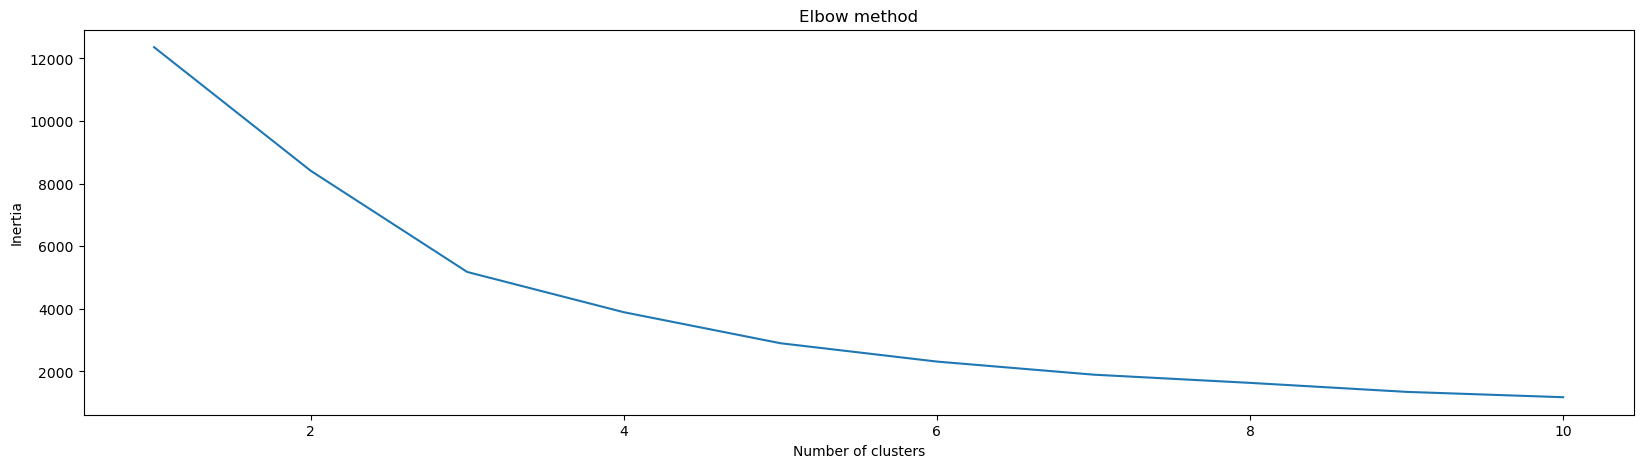

In [478]:
# Elbow method to determine optimal number of clusters
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

inertia_list = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_train[['Recency','Frequency','Monetary']])
    inertia = kmeans.inertia_
    inertia_list.append(inertia)

plt.plot(range(1, 11), inertia_list)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method')
plt.show()

##### 5.2.4 Clustering the unlabled training data

In [503]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3)
x_train['Cluster'] = kmeans.fit_predict(x_train[['Recency','Frequency','Monetary']])
x_train.head(5)

c:\Users\Jahanvi\anaconda3\envs\Data606_RFMAnalysis\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Recency  Frequency  Monetary  R_Score  F_Score  M_Score  Cluster
CustomerID                                                                   
18142.0     0.646675  -0.294124 -0.112466        1        2        3        0
15364.0     0.027689  -0.294124 -0.124404        2        2        3        1
15514.0    -0.800954   0.884851  0.237835        4        4        4        1
13930.0    -0.351690  -0.294124 -0.189060        2        2        2        1
17623.0    -0.601281  -0.425121 -0.167759        3        1        2        1

In [504]:
# Pints in each cluster
x_train['Cluster'].value_counts()

Cluster
1    2895
0     982
2      23
Name: count, dtype: int64

In [505]:
x_train.loc[x_train['Cluster'] == 2 ]

Recency  Frequency   Monetary  R_Score  F_Score  M_Score  Cluster
CustomerID                                                                    
17450.0    -0.840889   5.469752  21.616859        4        4        4        2
12971.0    -0.890807  10.709639   1.029446        4        4        4        2
13408.0    -0.910774   7.565706   2.929993        4        4        4        2
17841.0    -0.910774  15.687531   4.372843        4        4        4        2
17511.0    -0.900791   3.504794   9.997376        4        4        4        2
14606.0    -0.910774  11.233627   1.121149        4        4        4        2
16029.0    -0.541379   7.565706   7.956128        3        4        4        2
18102.0    -0.920758   7.303712  28.926895        4        4        4        2
13089.0    -0.900791  12.150608   6.377918        4        4        4        2
16422.0    -0.751036   6.124738   3.667363        4        4        4        2
13798.0    -0.910774   6.910721   3.944629        4        4        4        2
14646.0    -0.910774   8.875678  31.114154        4        4        4        2
14298.0    -0.840889   5.207757   5.558452        4        4        4        2
12748.0    -0.920758  26.429300   3.401592        4        4        4        2
14156.0    -0.830905   6.517729  12.879247        4        4        4        2
15061.0    -0.890807   5.731746   5.896055        4        4        4        2
13694.0    -0.890807   5.993740   7.075590        4        4        4        2
16684.0    -0.880823   3.111803   7.256800        4        4        4        2
16013.0    -0.890807   5.600749   3.942018        4        4        4        2
12415.0    -0.681150   2.063825  13.758934        3        4        4        2
14911.0    -0.910774  25.381322  15.073845        4        4        4        2
16446.0    -0.920758  -0.294124  18.688838        4        2        4        2
15311.0    -0.920758  11.364625   6.595969        4        4        4        2

##### 5.2.5 3D Visualization of each cluster

In [506]:
# 3D Scattered visualization of points in each cluster
import plotly.graph_objects as go

# Setting up the color scheme for the clusters (RGB order)
colors = ['#e8000b', '#1ac938', '#023eff', '#00ffff', '#07800f']

# Create separate data frames for each cluster
cluster_low = x_train[x_train['Cluster'] == 0]
cluster_mid = x_train[x_train['Cluster'] == 1]
cluster_high = x_train[x_train['Cluster'] == 2]


# Create a 3D scatter plot
fig = go.Figure()

# Add data points for each cluster separately and specify the color
fig.add_trace(go.Scatter3d(x=cluster_low['Recency'], y=cluster_low['Frequency'], z=cluster_low['Monetary'], 
                           mode='markers', marker=dict(color=colors[0], size=5, opacity=0.4), name='Low Value'))
fig.add_trace(go.Scatter3d(x=cluster_mid['Recency'], y=cluster_mid['Frequency'], z=cluster_mid['Monetary'], 
                           mode='markers', marker=dict(color=colors[1], size=5, opacity=0.4), name='Mid Value'))
fig.add_trace(go.Scatter3d(x=cluster_high['Recency'], y=cluster_high['Frequency'], z=cluster_high['Monetary'], 
                           mode='markers', marker=dict(color=colors[2], size=5, opacity=0.4), name='High Value'))
# fig.add_trace(go.Scatter3d(x=cluster_high_max['Recency'], y=cluster_high_max['Frequency'], z=cluster_high_max['Monetary'], 
#                            mode='markers', marker=dict(color=colors[3], size=5, opacity=0.4), name='High Value Max'))
# fig.add_trace(go.Scatter3d(x=cluster_high_pro['Recency'], y=cluster_high_pro['Frequency'], z=cluster_high_pro['Monetary'], 
#                            mode='markers', marker=dict(color=colors[4], size=5, opacity=0.4), name='High Value'))
# Set the title and layout details
fig.update_layout(
    title=dict(text='3D Visualization of Customer Clusters in RFM Features', x=0.5),
    scene=dict(
        xaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='Recency'),
        yaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='Frequency'),
        zaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='Monetary'),
    ),
    width=900,
    height=800
)

# Show the plot
fig.show()

##### 5.2.6 Segmentation within the cluster based on the feature variations

In [507]:
# creating separate dataframe of each cluster
df_Custer_Low_Value = x_train.loc[x_train['Cluster'] == 0]
df_Custer_Mid_Value = x_train.loc[x_train['Cluster'] == 1]
df_Custer_High_Value = x_train.loc[x_train['Cluster'] == 2]

In [508]:
df_Custer_Low_Value.describe()

Recency   Frequency    Monetary     R_Score     F_Score     M_Score  \
count  982.000000  982.000000  982.000000  982.000000  982.000000  982.000000   
mean     1.545885   -0.350818   -0.154921    1.012220    1.455193    1.733198   
std      0.672113    0.189231    0.354379    0.109922    0.730526    0.845988   
min      0.456986   -0.425121   -0.226514    1.000000    1.000000    1.000000   
25%      0.966152   -0.425121   -0.208136    1.000000    1.000000    1.000000   
50%      1.495285   -0.425121   -0.192190    1.000000    1.000000    2.000000   
75%      2.084321   -0.294124   -0.167055    1.000000    2.000000    2.000000   
max      2.803144    3.897786    8.439093    2.000000    4.000000    4.000000   

       Cluster  
count    982.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0

In [509]:
df_Custer_Mid_Value.describe()

Recency    Frequency     Monetary      R_Score      F_Score  \
count  2895.000000  2895.000000  2895.000000  2895.000000  2895.000000   
mean     -0.510442     0.056967    -0.018337     2.992055     2.583420   
std       0.355759     0.682377     0.371895     0.823132     1.115575   
min      -0.920758    -0.425121    -0.226273     1.000000     1.000000   
25%      -0.800954    -0.294124    -0.182325     2.000000     2.000000   
50%      -0.621248    -0.163127    -0.124849     3.000000     3.000000   
75%      -0.286796     0.229865     0.002778     4.000000     4.000000   
max       0.706577     6.648726     6.089014     4.000000     4.000000   

           M_Score  Cluster  
count  2895.000000   2895.0  
mean      2.737478      1.0  
std       1.083023      0.0  
min       1.000000      1.0  
25%       2.000000      1.0  
50%       3.000000      1.0  
75%       4.000000      1.0  
max       4.000000      1.0

In [510]:
df_Custer_High_Value.describe()

Recency  Frequency   Monetary    R_Score    F_Score  M_Score  Cluster
count  23.000000  23.000000  23.000000  23.000000  23.000000     23.0     23.0
mean   -0.864329   8.704812   9.703569   3.913043   3.913043      4.0      2.0
std     0.091532   6.472161   8.366923   0.288104   0.417029      0.0      0.0
min    -0.920758  -0.294124   1.029446   3.000000   2.000000      4.0      2.0
25%    -0.910774   5.535250   3.943323   4.000000   4.000000      4.0      2.0
50%    -0.900791   6.910721   6.595969   4.000000   4.000000      4.0      2.0
75%    -0.860856  10.971633  13.319091   4.000000   4.000000      4.0      2.0
max    -0.541379  26.429300  31.114154   4.000000   4.000000      4.0      2.0

In [511]:
# Defining Min Max Threshold for Cluster 0 - Low ValuDefini
describe_25_for_clusterLow_0_recency  = df_Custer_Low_Value.describe().iloc[4].Recency
describe_25_for_clusterLow_0_frequency = df_Custer_Low_Value.describe().iloc[4].Frequency
describe_25_for_clusterLow_0_monetary = df_Custer_Low_Value.describe().iloc[4].Monetary
describe_75_for_clusterLow_0_recency  = df_Custer_Low_Value.describe().iloc[6].Recency
describe_75_for_clusterLow_0_frequency = df_Custer_Low_Value.describe().iloc[6].Frequency
describe_75_for_clusterLow_0_monetary = df_Custer_Low_Value.describe().iloc[6].Monetary

# Defining Min Max Threshold for Cluster 1 - Mid Value
describe_25_for_clusterMid_1_recency  = df_Custer_Mid_Value.describe().iloc[4].Recency
describe_25_for_clusterMid_1_frequency = df_Custer_Mid_Value.describe().iloc[4].Frequency
describe_25_for_clusterMid_1_monetary = df_Custer_Mid_Value.describe().iloc[4].Monetary
describe_75_for_clusterMid_1_recency  = df_Custer_Mid_Value.describe().iloc[6].Recency
describe_75_for_clusterMid_1_frequency = df_Custer_Mid_Value.describe().iloc[6].Frequency
describe_75_for_clusterMid_1_monetary = df_Custer_Mid_Value.describe().iloc[6].Monetary

In [512]:
# Segmentation of Low Value Cluster
df_Custer_Low_Value.loc[(df_Custer_Low_Value['Recency'] >= describe_75_for_clusterLow_0_recency) & (df_Custer_Low_Value['Frequency'] <= describe_25_for_clusterLow_0_frequency) & (df_Custer_Low_Value['Monetary'] <= describe_25_for_clusterLow_0_monetary), 'Customer_Segments'] = 'Lost'
df_Custer_Low_Value.loc[(df_Custer_Low_Value['Recency'] <= describe_25_for_clusterLow_0_recency) & (df_Custer_Low_Value['Frequency'] >= describe_75_for_clusterLow_0_frequency) & (df_Custer_Low_Value['Monetary'] >= describe_75_for_clusterLow_0_frequency), 'Customer_Segments'] = 'Need Attention'


C:\Users\Jahanvi\AppData\Local\Temp\ipykernel_7184\2336635626.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [513]:
# Filling the value for 3rd segment
df_Custer_Low_Value['Customer_Segments'].fillna('At Risk', inplace = True)

C:\Users\Jahanvi\AppData\Local\Temp\ipykernel_7184\3128888157.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [515]:
# Segmentation of Mid Value Cluster
df_Custer_Mid_Value.loc[(df_Custer_Mid_Value['Recency'] >= describe_75_for_clusterMid_1_recency) & (df_Custer_Mid_Value['Frequency'] <= describe_25_for_clusterMid_1_frequency) & (df_Custer_Mid_Value['Monetary'] <= describe_25_for_clusterMid_1_monetary), 'Customer_Segments'] = 'Small Buyers/Cannot Lose'
df_Custer_Mid_Value.loc[(df_Custer_Mid_Value['Recency'] <= describe_25_for_clusterMid_1_recency) & (df_Custer_Mid_Value['Frequency'] >= describe_75_for_clusterMid_1_frequency) & (df_Custer_Mid_Value['Monetary'] >= describe_75_for_clusterMid_1_monetary), 'Customer_Segments'] = 'Loyal'

In [516]:
# Filling the value for 3rd segment
df_Custer_Mid_Value['Customer_Segments'].fillna('Potential Loyalist', inplace = True)

C:\Users\Jahanvi\AppData\Local\Temp\ipykernel_7184\2125363772.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [517]:
# In High Value Cluster there can be only on segment 
df_Custer_High_Value['Customer_Segments'] = 'Champions'

C:\Users\Jahanvi\AppData\Local\Temp\ipykernel_7184\1440043112.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [518]:
# merging the dataframe separate Dataframe of 3 clusters 
df_cluster_scaled_segment = pd.concat([df_Custer_Low_Value, df_Custer_Mid_Value, df_Custer_High_Value])
df_cluster_scaled_segment

Recency  Frequency   Monetary  R_Score  F_Score  M_Score  \
CustomerID                                                              
18142.0     0.646675  -0.294124  -0.112466        1        2        3   
16913.0     1.974501  -0.425121  -0.214199        1        1        1   
14957.0     1.605106  -0.425121  -0.220368        1        1        1   
16586.0     1.555187  -0.425121  -0.174844        1        1        2   
12956.0     2.134239  -0.425121  -0.214802        1        1        1   
...              ...        ...        ...      ...      ...      ...   
16013.0    -0.890807   5.600749   3.942018        4        4        4   
12415.0    -0.681150   2.063825  13.758934        3        4        4   
14911.0    -0.910774  25.381322  15.073845        4        4        4   
16446.0    -0.920758  -0.294124  18.688838        4        2        4   
15311.0    -0.920758  11.364625   6.595969        4        4        4   

            Cluster Customer_Segments  
CustomerID                             
18142.0           0    Need Attention  
16913.0           0           At Risk  
14957.0           0           At Risk  
16586.0           0           At Risk  
12956.0           0              Lost  
...             ...               ...  
16013.0           2         Champions  
12415.0           2         Champions  
14911.0           2         Champions  
16446.0           2         Champions  
15311.0           2         Champions  

[3900 rows x 8 columns]

In [519]:
# Tree map of Customer Segments
segment_customer_counts_tree = df_cluster_scaled_segment.groupby(['Cluster', 'Customer_Segments']).size().reset_index(name='Count')
pastel_colors = px.colors.qualitative.Pastel

segment_customer_counts_tree = segment_customer_counts_tree.sort_values('Count', ascending=False)

fig_treemap_segment_customers = px.treemap(segment_customer_counts_tree, 
                                         path=['Cluster', 'Customer_Segments'], 
                                         values='Count',
                                         color='Customer_Segments', color_discrete_map={'(?)':'lightgray', 'Potential Loyalist':'plum', 'Loyal':'thistle', 'Small Buyers/Cannot Lose':'pink', 'At Risk': 'lightskyblue', 'Need Attention': 'darkturquoise', 'Champions':'gold' },
                                         title='RFM Customer Segments by Features',
                                         width=1000, height=500,
                                         )
fig_treemap_segment_customers.show()


- Defintion of Segments

> - Low Value Customers -

>1. Lost - 

>2. At Risk -

>3. Need Attention - 

> - Mid Value Customers - 

>4. Small Buyers/ Can't Loser - 

>5. Potential Loyalist - 

>6. Loyal -

> - High Value Customers - 

>7. Champions -


In [520]:
# Bar graph comparing the number of customers in each segment
import plotly.colors

pastel_colors = plotly.colors.qualitative.Pastel

segment_customer_counts_bar = df_cluster_scaled_segment['Customer_Segments'].value_counts()

# Create a bar chart to compare segment counts
fig = go.Figure(data=[go.Bar(x=segment_customer_counts_bar.index, y=segment_customer_counts_bar.values,
                            marker=dict(color=pastel_colors))])

# Set the color of the Champions segment as a different color
champions_color = 'rgb(158, 202, 225)'
fig.update_traces(marker_color=[champions_color if segment == 'Champions' else pastel_colors[i]
                                for i, segment in enumerate(segment_customer_counts_bar.index)],
                  marker_line_color='rgb(8, 48, 107)',
                  marker_line_width=1, opacity=0.6)

# Update the layout
fig.update_layout(title='Comparison of Customer Segments',
                  xaxis_title='RFM Segments',
                  yaxis_title='Number of Customers',
                  showlegend=False, width=1000, height=1000)

fig.show()

##### 5.2.7 Performance Evaluation

In [521]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from tabulate import tabulate

# Compute number of customers
num_observations = len(x_train)

# Separate the features and the cluster labels
X = x_train.drop('Cluster', axis=1)
clusters = x_train['Cluster']

# Compute the metrics
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Create a table to display the metrics and the number of observations
table_data = [
    ["Number of Observations", num_observations],
    ["Silhouette Score", sil_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+-------------------------+--------------------+
|         Metric          |       Value        |
+-------------------------+--------------------+
| Number of Observations  |        3900        |
|    Silhouette Score     | 0.367146739104975  |
| Calinski Harabasz Score | 1506.2040982107155 |
|  Davies Bouldin Score   | 0.8915073289089759 |
+-------------------------+--------------------+


- Performance Evaluation Metrix

1. Silhouette Score:

    > Measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The score ranges from -1 to 1, where a high value indicates well-defined clusters.

2. Calinski-Harabasz Index:

    > Evaluates the ratio of the between-cluster variance to the within-cluster variance. A higher Calinski-Harabasz index suggests better-defined clusters.

3. Davies-Bouldin Index:

    > Measures the average similarity between each cluster and its most similar cluster. Lower values indicate better clustering.


##### 5.2.8 Testing the Model

In [535]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3)
x_test['Cluster'] = kmeans.fit_predict(x_test[['Recency','Frequency','Monetary']])


c:\Users\Jahanvi\anaconda3\envs\Data606_RFMAnalysis\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Jahanvi\anaconda3\envs\Data606_RFMAnalysis\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



Recency  Frequency  Monetary  R_Score  F_Score  M_Score  Cluster
CustomerID                                                                   
13483.0    -0.271821  -0.425121 -0.211178        2        1        1        1
16098.0    -0.052180   0.360862 -0.001747        2        4        4        1
14896.0     1.115907  -0.294124 -0.174303        1        2        2        0
14882.0    -0.661183  -0.294124 -0.160725        3        2        2        1
16339.0     1.914599  -0.425121 -0.214590        1        1        1        0

In [538]:
x_test.head(20)

Recency  Frequency  Monetary  R_Score  F_Score  M_Score  Cluster
CustomerID                                                                   
13483.0    -0.271821  -0.425121 -0.211178        2        1        1        1
16098.0    -0.052180   0.360862 -0.001747        2        4        4        1
14896.0     1.115907  -0.294124 -0.174303        1        2        2        0
14882.0    -0.661183  -0.294124 -0.160725        3        2        2        1
16339.0     1.914599  -0.425121 -0.214590        1        1        1        0
17571.0    -0.421575  -0.032130 -0.058826        3        3        3        1
18265.0    -0.201935  -0.294124 -0.140312        2        2        3        1
14158.0    -0.521412  -0.425121 -0.169936        3        1        2        1
12473.0    -0.391624  -0.163127  0.064564        2        3        4        1
18245.0    -0.850872   0.360862  0.061289        4        4        4        1
16393.0    -0.900791   1.146845  0.115087        4        4        4        1
13717.0    -0.601281   0.229865 -0.064692        3        4        3        1
16717.0    -0.691134   0.229865  0.206276        3        4        4        1
13395.0     0.926217  -0.425121 -0.192385        1        1        2        0
17930.0    -0.571330   0.098868 -0.031518        3        3        4        1
12426.0     1.016070  -0.425121 -0.169592        1        1        2        0
13102.0    -0.910774   2.587814  0.494349        4        4        4        2
16298.0    -0.701118  -0.163127 -0.159771        3        3        2        1
12506.0     1.395449  -0.425121 -0.218683        1        1        1        0
17504.0     1.135874   0.622856  0.109565        1        4        4        0

In [537]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from tabulate import tabulate

# Compute number of customers
num_observations = len(x_test)

# Separate the features and the cluster labels
X_pred = x_test.drop('Cluster', axis=1)
clusters = x_test['Cluster']

# Compute the metrics
sil_score = silhouette_score(X_pred, clusters)
calinski_score = calinski_harabasz_score(X_pred, clusters)
davies_score = davies_bouldin_score(X_pred, clusters)

# Create a table to display the metrics and the number of observations
table_data = [
    ["Number of Observations", num_observations],
    ["Silhouette Score", sil_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+-------------------------+--------------------+
|         Metric          |       Value        |
+-------------------------+--------------------+
| Number of Observations  |        434         |
|    Silhouette Score     | 0.2876719533687648 |
| Calinski Harabasz Score | 186.91113595645248 |
|  Davies Bouldin Score   | 0.9367345019137522 |
+-------------------------+--------------------+


In [583]:
import pickle
filename = 'trained_model_clustering.sav'
pickle.dump(kmeans, open(filename, 'wb'))